# Tratamento dos dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [3]:
# https://www.kaggle.com/competitions/bike-sharing-demand/data
base = pd.read_csv('train.csv')
base

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
base = pd.read_csv('train.csv', parse_dates=['datetime'], index_col = 0)
base

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [5]:
base.drop(columns = ['season', 'holiday','workingday','weather','temp','atemp', 'humidity','windspeed','casual', 'registered'], axis = 1, inplace = True)
base

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168


In [6]:
base = base.groupby(pd.Grouper(freq = 'D')).sum()
base

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


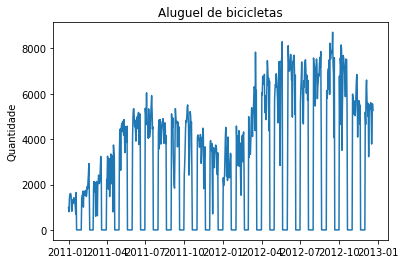

In [10]:
plt.plot(base['count'])
plt.ylabel('Quantidade')
plt.title('Aluguel de bicicletas');

# Configurações do SageMaker

In [11]:
import boto3
import sagemaker
from sagemaker import RandomCutForest

In [14]:
session = sagemaker.Session()
bucket = 'cursoawssagemaker'
subpasta_dataset = 'datasets/bike/random-cut'
subpasta_modelo = 'modelos/bike/random-cut'
key = 'bike-random-cut'
s3_data = 's3://{}/{}/{}'.format(bucket, subpasta_dataset, key)
output_location = 's3://{}/{}'.format(bucket, subpasta_modelo)
role = sagemaker.get_execution_role()
boto3.Session().client('s3').head_bucket(Bucket = bucket)
print('Localização da base de dados: ', s3_data)
print('Localização do modelo: ', output_location)

Localização da base de dados:  s3://cursoawssagemaker/datasets/bike/random-cut/bike-random-cut
Localização do modelo:  s3://cursoawssagemaker/modelos/bike/random-cut


# Treinamento do Random Cut

In [20]:
base['count'].to_numpy().reshape(-1,1).shape

(719, 1)

In [23]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/randomcutforest.html
# https://docs.aws.amazon.com/sagemaker/latest/dg/rcf_hyperparameters.html
# https://sagemaker.readthedocs.io/en/stable/algorithms/sagemaker.amazon.amazon_estimator.html
random_cut = RandomCutForest(role = role,
                             instance_count = 1,
                             instance_type = 'ml.m4.xlarge',
                             data_location = s3_data,
                             output_path = output_location,
                             use_spot_instances = True,
                             max_run = 3600,
                             max_wait = 3600)
random_cut.fit(random_cut.record_set(base['count'].to_numpy().reshape(-1,1)))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2022-05-23 18:03:44 Starting - Starting the training job...ProfilerReport-1653329023: InProgress
...
2022-05-23 18:04:24 Starting - Launching requested ML instances............
2022-05-23 18:06:44 Starting - Preparing the instances for training...............
2022-05-23 18:09:08 Downloading - Downloading input data...
2022-05-23 18:09:45 Training - Downloading the training image...
2022-05-23 18:10:15 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[05/23/2022 18:10:11 INFO 140327100434240] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'num_samples_per_tree': 256, 'num_trees': 100, 'force_dense': 'true', 'eval_metrics': ['accuracy', 'precision_recall_fscore'], 'epochs': 1, 'mini_batch_size': 1000, '_log_level': 'info', '_kvstore': 'dist_async', '_num_kv_servers': 'auto', '_num_gpus': 'auto', '_tuning_objective_metric': '', 

# Deploy e inferências

In [24]:
random_cut_bikes = random_cut.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


------!

In [26]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer
random_cut_bikes.serializer = CSVSerializer()
random_cut_bikes.deserializer = JSONDeserializer()

In [30]:
base_numpy = base['count'].to_numpy().reshape(-1,1)
base_numpy[0:5], base_numpy.shape

(array([[ 985],
        [ 801],
        [1349],
        [1562],
        [1600]]),
 (719, 1))

In [ ]:
previsoes = random_cut_bikes.predict(base_numpy)
previsoes

In [32]:
previsoes = [p['score'] for p in previsoes['scores']]

In [34]:
previsoes[0:5]

[1.8236626082, 1.8486645415, 1.7938483736, 1.7604309674, 1.7537491771]

In [35]:
base['score'] = pd.Series(previsoes, index = base.index)
base

,count,score
datetime,,
2011-01-01,985,1.823663
2011-01-02,801,1.848665
2011-01-03,1349,1.793848
2011-01-04,1562,1.760431
2011-01-05,1600,1.753749
...,...,...
2012-12-15,5047,1.633584
2012-12-16,3786,1.596290
2012-12-17,4585,1.589719


In [36]:
base.describe()

,count,score
count,719.000000,719.000000
mean,2900.522949,1.635812
std,2659.328686,0.152254
min,0.000000,1.489934
25%,0.000000,1.489934
50%,2935.000000,1.602467
75%,5027.500000,1.722886
max,8714.000000,2.178006


In [42]:
min(previsoes), max(previsoes), 1.4 * max(previsoes)

(1.4899342591, 2.1780058397, 3.0492081755799996)

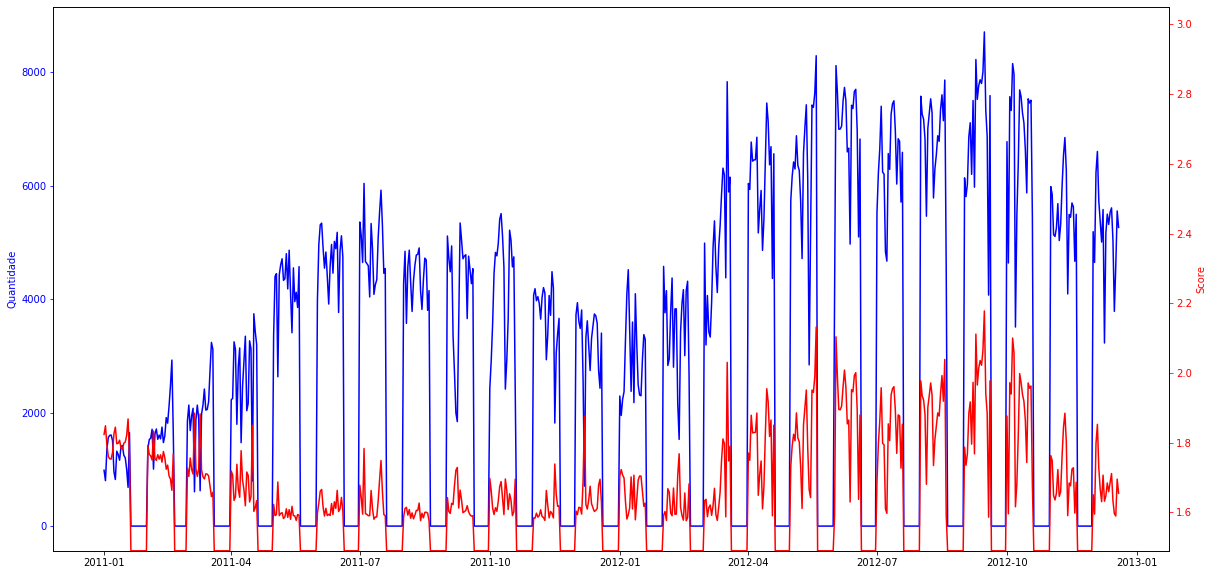

In [47]:
fig, ax1 = plt.subplots(figsize=(20,10))
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html
ax2 = ax1.twinx()

ax1.plot(base['count'], color = 'b')
ax2.plot(base['score'], color = 'r')

ax1.set_ylabel('Quantidade', color = 'b')
ax2.set_ylabel('Score', color = 'r')

ax1.tick_params('y', colors = 'b')
ax2.tick_params('y', colors = 'r')

ax2.set_ylim(min(previsoes), 1.4 * max(previsoes));

In [48]:
media_score = base['score'].mean()
media_score

1.635811544875517

In [49]:
desvio_padrao_score = base['score'].std()
desvio_padrao_score

0.152254003018809

In [50]:
corte_score = media_score + 3 * desvio_padrao_score
corte_score

2.092573553931944

In [51]:
outliers = base[base['score'] > corte_score]
outliers

,count,score
datetime,,
2012-05-19,8294,2.131793
2012-06-02,8120,2.103722
2012-09-09,8227,2.111478
2012-09-15,8714,2.178006
2012-10-05,8156,2.100224


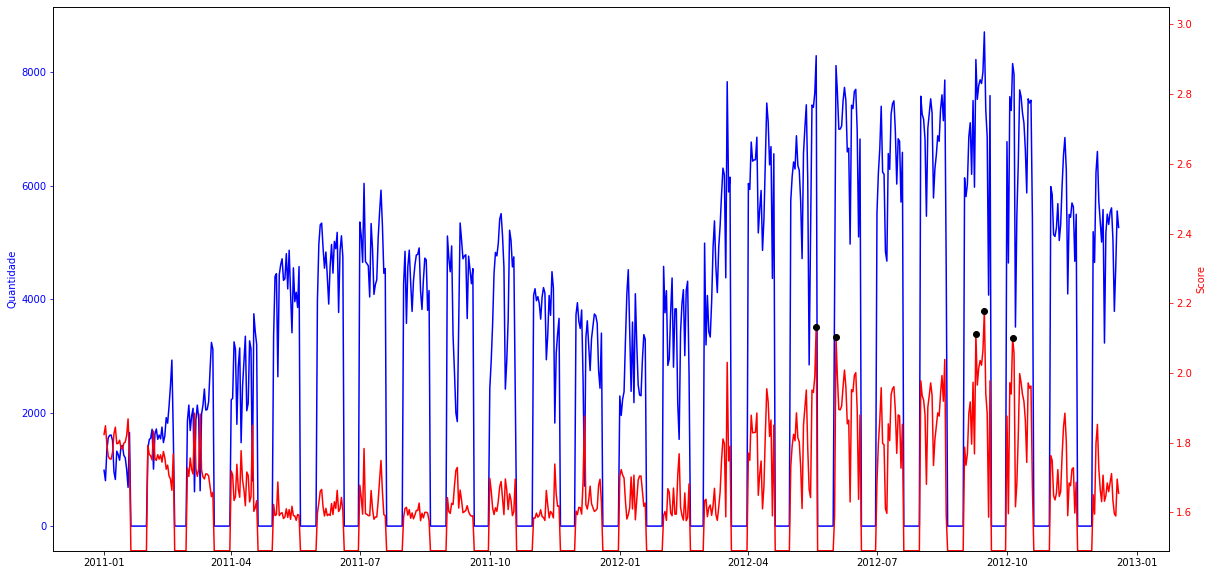

In [52]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
ax2.plot(outliers.index, outliers['score'], 'ko')
fig

In [53]:
random_cut_bikes.delete_endpoint()